# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#merge on mouse ID
mouse_study = mouse_metadata.merge(study_results, on="Mouse ID")
# Display the data table for preview
mouse_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_metadata)
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = mouse_study[mouse_study.duplicated(['Mouse ID','Timepoint']) == True]
mice_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_data = mouse_study[mouse_study['Mouse ID']=='g989']
dupe_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study['Mouse ID']!='g989']
clean_mouse_metadata = mouse_metadata[mouse_metadata['Mouse ID']!='g989']
clean_mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_mouse_metadata)
mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#start with emtpy dataframe
drug_summary = pd.DataFrame()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#adding new columns to the drug_summary df using groupby
drug_summary["Mean Tumor Volume"] = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_summary["Median Tumor Volume"] = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_summary["Tumor Volume Variance"] = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_summary["Tumor Volume Std Dev"] = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_summary["Tumor Volume Std Err"] = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_summary = clean_mouse_study.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
agg_drug_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of observed mouse timepoints')

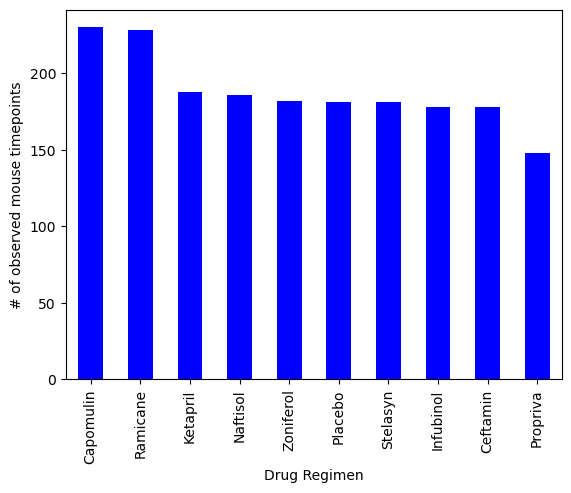

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#get counts of mice per drug
drug_count = clean_mouse_study["Drug Regimen"].value_counts()
#plot and label
plot_drug_count = drug_count.plot.bar(color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

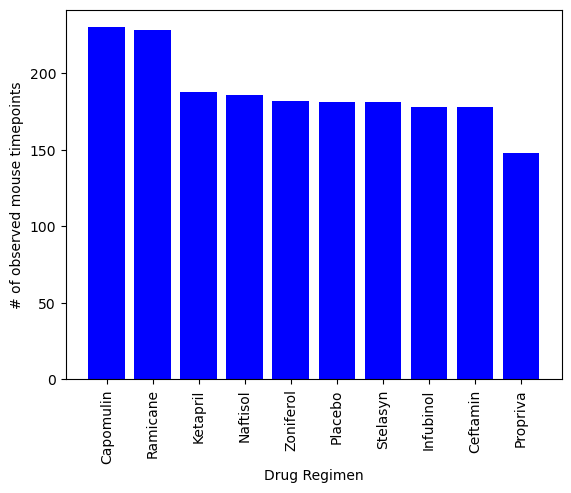

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#make axis
x_axis = drug_count.index.values
y_axis = drug_count.values
#plot and label
plt.bar(x_axis,y_axis,color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")
plt.xticks(rotation=90)


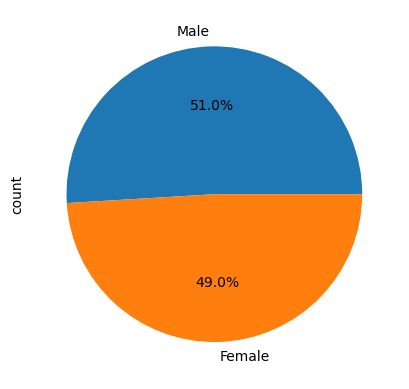

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#count gender
mouse_gender=clean_mouse_study["Sex"].value_counts()
mouse_gender.plot.pie(autopct='%1.1f%%')
plt.show()

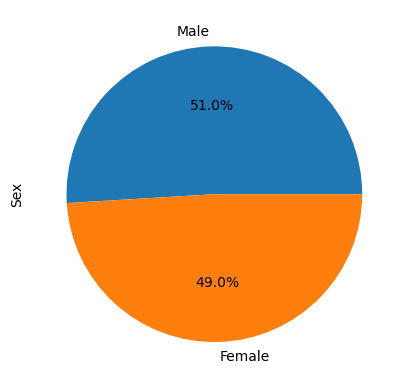

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
plot = mouse_gender.plot.pie(y='Total Count',autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
all_mouse_finals = clean_mouse_study.groupby('Mouse ID').max()['Timepoint']
all_mouse_final_vol=pd.DataFrame(all_mouse_finals)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_mouse_study_final = pd.merge(all_mouse_final_vol,clean_mouse_study, on=("Mouse ID","Timepoint"))



In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

    #seperating data frame of final mouse tumor size for each drug
#doing each drug seperately
Capomulin = clean_mouse_study_final.loc[clean_mouse_study_final["Drug Regimen"]=="Capomulin",:]
capomulin_tumors = Capomulin["Tumor Volume (mm3)"]
capomulin_quartiles = capomulin_tumors.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_upperb = capomulin_upperq + (1.5*capomulin_iqr)
capomulin_lowerb = capomulin_lowerq - (1.5*capomulin_iqr)

Ramicane = clean_mouse_study_final.loc[clean_mouse_study_final["Drug Regimen"]=="Ramicane",:]
ramicane_tumors = Ramicane["Tumor Volume (mm3)"]
ramicane_quartiles = ramicane_tumors.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_upperb = ramicane_upperq + (1.5*ramicane_iqr)
ramicane_lowerb = ramicane_lowerq - (1.5*ramicane_iqr)

Infubinol = clean_mouse_study_final.loc[clean_mouse_study_final["Drug Regimen"]=="Infubinol",:]
infubinol_tumors = Infubinol["Tumor Volume (mm3)"]
infubinol_quartiles = infubinol_tumors.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_upperb = infubinol_upperq + (1.5*infubinol_iqr)
infubinol_lowerb = infubinol_lowerq - (1.5*infubinol_iqr)

Ceftamin = clean_mouse_study_final.loc[clean_mouse_study_final["Drug Regimen"]=="Ceftamin",:]
ceftamin_tumors = Ceftamin["Tumor Volume (mm3)"]
ceftamin_quartiles = ceftamin_tumors.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_upperb = ceftamin_upperq + (1.5*ceftamin_iqr)
ceftamin_lowerb = ceftamin_lowerq - (1.5*ceftamin_iqr)    



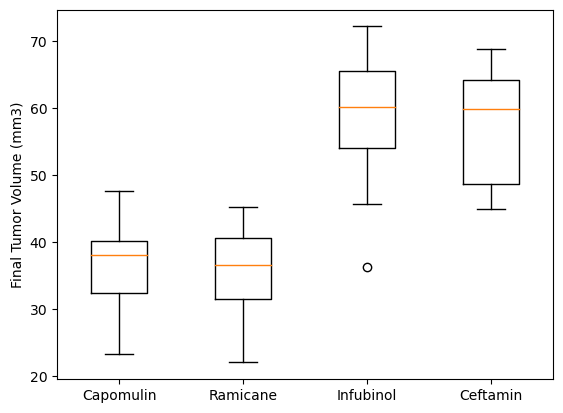

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#combine tumor size data for each regimen
drug_data = [capomulin_tumors,ramicane_tumors,infubinol_tumors,ceftamin_tumors]
Regimen = ['Capomulin','Ramicane','Infubinol','Ceftamin']

fig, drug_boxplot = plt.subplots()
drug_boxplot.set_ylabel('Final Tumor Volume (mm3)')
drug_boxplot.boxplot(drug_data, labels=Regimen)
plt.show()

## Line and Scatter Plots

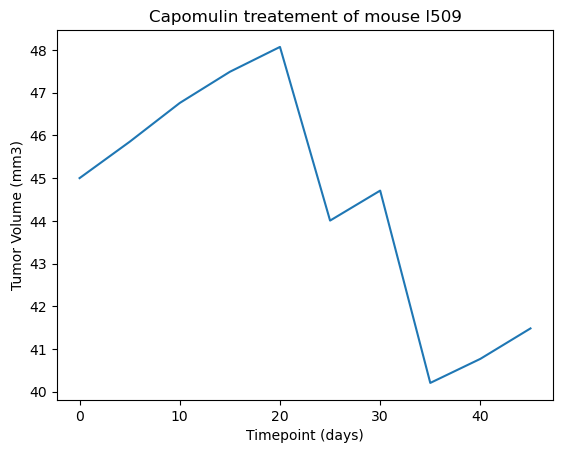

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#using l509 like in provided image. search original mouse study data for that mouse.
single_mouse = mouse_study.loc[mouse_study["Mouse ID"]=="l509",:]
#grab the timepoint and tumor volume values
x_axis = single_mouse["Timepoint"]
y_axis = single_mouse["Tumor Volume (mm3)"]

plt.title('Capomulin treatement of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.plot(x_axis,y_axis)
plt.show()

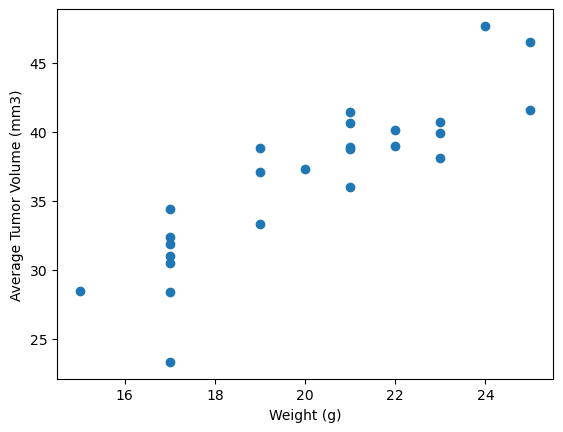

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#get weight and tumor volume
x_axis = Capomulin["Weight (g)"]
y_axis = Capomulin["Tumor Volume (mm3)"]
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis)

## Correlation and Regression

R-squared: 0.768613


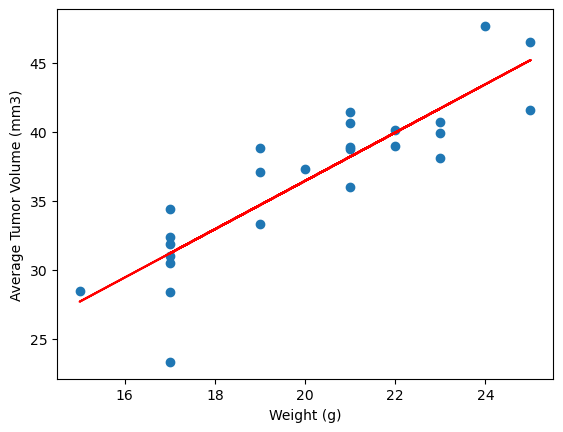

In [69]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis)

from scipy import stats
res = stats.linregress(x_axis,y_axis)
plt.plot(x_axis, res.intercept + res.slope*x_axis, 'r')

print(f"R-squared: {res.rvalue**2:.6f}")